<a href="https://colab.research.google.com/github/Evans-tats/machine-learning/blob/main/first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
from torch import nn # contain all of pytorch building blocks for neural networks
import matplotlib.pyplot as plt

#check PyTorch Version
torch.__version__

# create *known* parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [7]:
#create a train/test split
train_slip = int(0.8 * len(X))
X_train, y_train = X[:train_slip], y[:train_slip]
X_test, y_test = X[train_slip:], y[train_slip:]




In [22]:

#visualize
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     prediction=None):
  """plots trainining data, test data and compare. """
  plt.figure(figsize=(10,7))
  X_train

  #plot training data in blues
  plt.scatter(train_data,train_labels, c='b', s=4, label="training data")
  #plot test data in green
  plt.scatter(test_data,test_labels, c='g', s=4, label="test data")

  if prediction is not None:
    plt.scatter(test_data,prediction, c='r', s=4, label="predictions")
  plt.legend(prop={"size":14});


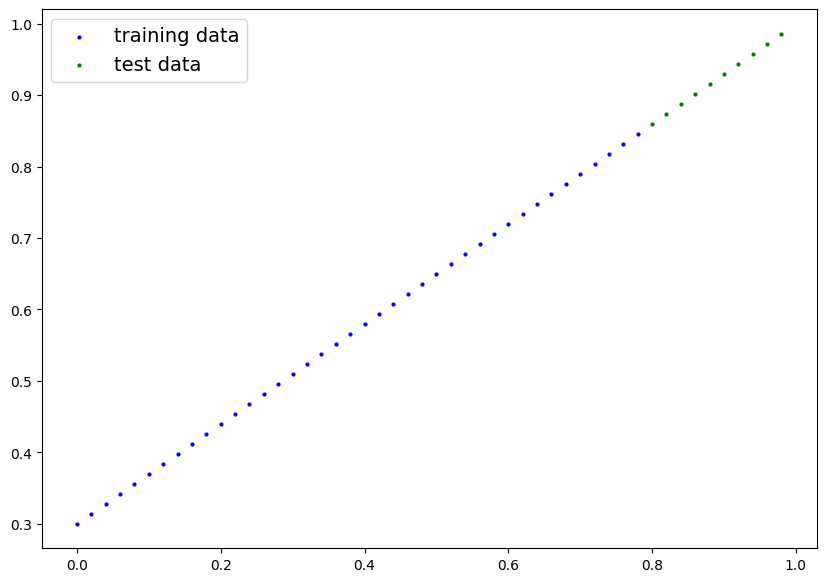

In [23]:
plot_predictions();

torch.nn-contains all of the
buildings for computational graphs(a anueral network can be considered a computational graph)


torch.nn.Parameter- what parameters should our model try and learn, often a PyTorch layer from torch.nn will set for us


torch.nn.module- The base class for
the neural network module, if you subclass it, you should overwite foward()

2. BUILD MODEL

In [44]:
from torch import nn
#creating linear regression model class

class linearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  #Foward() defines the computation in. the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [45]:
#Create random seed
torch.manual_seed(14)

#Create an instance of the model(this is cubclass of nn.Module)
model_0 = linearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([-1.0141])), ('bias', tensor([-0.3720]))])

In [46]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[-1.1833],
        [-1.2036],
        [-1.2239],
        [-1.2442],
        [-1.2645],
        [-1.2848],
        [-1.3050],
        [-1.3253],
        [-1.3456],
        [-1.3659]])

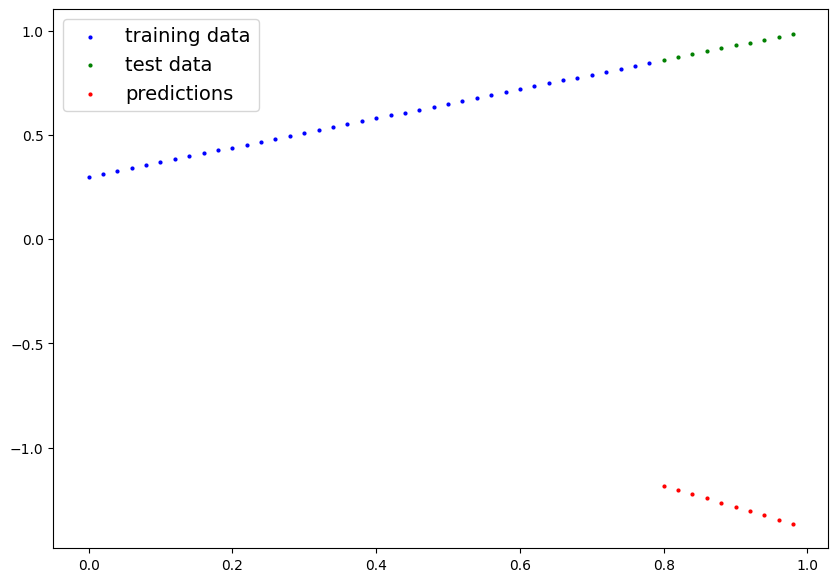

In [47]:
plot_predictions(prediction=y_preds)

TRAIN MODEL


In [49]:
#setup a loss function
loss_fn = nn.L1Loss()
#setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

TRAIN LOOP

*Loop through the data   
*foward pass (this involves data moving through our mode's 'foward function' to make predictions on data--foward propagation
*   calculate loss( compare foward pass prediction to ground truth)
*   optimizer zero grad


*   loss backward - move backward through the network to calculate the gradient each of the parameter of our model with respect to the loss
*   optimizer step - use the optimizer to adjust our model's parameters to improve the loss







In [90]:
epochs = 1000

for epoch in range(epochs):
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to be True
  #1. Forward pass
  y_pred = model_0(X_train)
  #calculate loss
  loss = loss_fn(y_pred, y_train)
  print(f"loss {loss}")
  #optimizer zero grad
  optimizer.zero_grad()
  #Perform backpropagation on the loss with the respect to the parameter of model
  loss.backward()
  #step the optimizer (perform gradient descent)
  optimizer.step()
  ###testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"epoch{epoch} | loss: {loss} | test loss: {test_loss}")
    print(model_0.state_dict())






loss 0.25812846422195435
epoch0 | loss: 0.25812846422195435 | test loss: 0.7212315797805786
OrderedDict([('weights', tensor([-0.5221])), ('bias', tensor([0.6665]))])
loss 0.25669121742248535
loss 0.2554130554199219
loss 0.2542840540409088
loss 0.25315508246421814
loss 0.25202611088752747
loss 0.2508971095085144
loss 0.24976813793182373
loss 0.24863915145397186
loss 0.2475101500749588
loss 0.24646656215190887
epoch10 | loss: 0.24646656215190887 | test loss: 0.6772108674049377
OrderedDict([('weights', tensor([-0.4951])), ('bias', tensor([0.6865]))])
loss 0.24559637904167175
loss 0.24472622573375702
loss 0.2438560426235199
loss 0.24298593401908875
loss 0.24211576581001282
loss 0.2412455976009369
loss 0.24037542939186096
loss 0.23950526118278503
loss 0.2386351376771927
loss 0.23783448338508606
epoch20 | loss: 0.23783448338508606 | test loss: 0.6402561664581299
OrderedDict([('weights', tensor([-0.4699])), ('bias', tensor([0.7010]))])
loss 0.23717279732227325
loss 0.23651108145713806
loss 0.

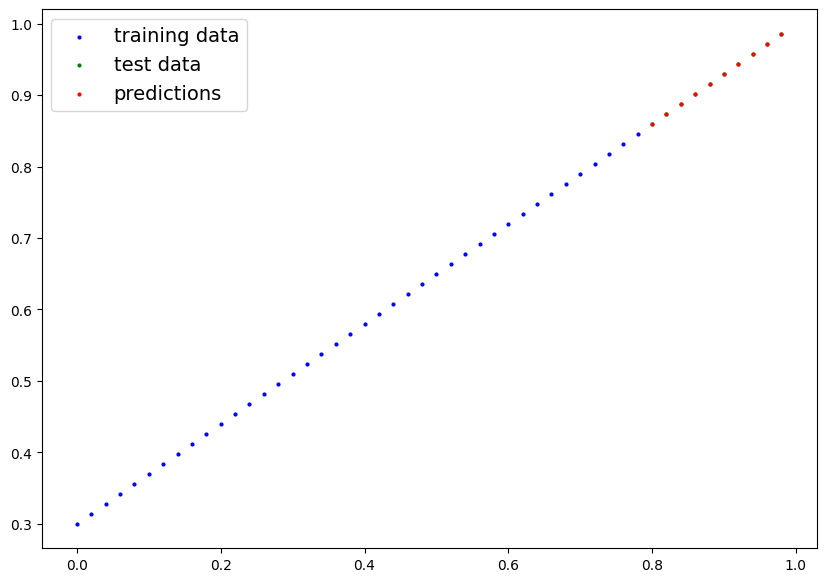

In [91]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
plot_predictions(prediction=y_preds_new)